In [1]:
# defines and prepares altered genes, i.e. differential promoter methylation + expression tendency
# saved in altered-genes-per-patient.rds
# overlap of these between metastases pairs

In [42]:
library(pheatmap)
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



In [2]:
basePath = "/data/bcu_projects/MelBrainSys_PostdocProject_Gruetzmann/publications/2022-my-MelBrainSys-paper/scripts-etc-for-publication/"
setwd(basePath)

In [33]:
# define met. pairs, and annotation colors 
tmp = readRDS(file = "annotation/samplePairs-annotation-colors-clusters.rds")
patient_colors = tmp$patient_colors
tissue_colors = tmp$tissue_colors
neededSamples = tmp$neededSamples
sampleMapping = tmp$sampleMapping
samplePairs = tmp$samplePairs
samplePairPerSubgroup = tmp$samplePairPerSubgroup
subgroupPerSamplePair = tmp$subgroupPerSamplePair
subgroupNames = tmp$subgroupNames
colAnnot = tmp$colAnnot
annotColors = tmp$annotColors

In [4]:
expr = read.csv(file = "data/MelBrainSys_RNA_HMM_output.txt",
                header = T,sep = "\t",stringsAsFactors = F)
colnames(expr)[colnames(expr)=="Genes"] = "EnsemblID"
head(expr,3)
length(which(duplicated(expr$Gene))) # no duplicated genes

,EnsemblID,P03_BLun,P04_BSki_1,P04_BSki_2,P08_BSof_1,P08_BSof_2,P08_BSof_3,P16_BLun,P18_BLun_1,P18_BLun_2,P39_BLun,P42_BLym_1,P42_BLym_2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ENSG00000237683,=,=,=,=,=,=,=,=,=,=,+,=
2,ENSG00000188976,=,=,=,=,=,=,=,=,=,=,=,=
3,ENSG00000187961,=,=,=,=,=,=,-,=,-,=,=,=


[1] 0

In [5]:
methyl = read.csv(file = "data/MelBrainSys_diffMethylatedGenes_expressionTrend.txt",header = T,sep = "\t",stringsAsFactors = F)
colnames(methyl) = gsub("\\.","_",colnames(methyl))
colnames(methyl)[colnames(methyl)=="P16_Blun"] = "P16_BLun"
colnames(methyl)[colnames(methyl)=="P03_Blun"] = "P03_BLun"
head(methyl,3)

# remove duplicated genes:
length(which(duplicated(methyl$Gene)))
g = methyl$Gene[which(duplicated(methyl$Gene))]
wh= which(methyl$Gene %in% g)
g
length(wh)
methyl = methyl[-wh,]
length(which(duplicated(methyl$Gene)))

,EnsemblID,Gene,P03_BLun,P16_BLun,P18_BLun_1,P18_BLun_2,P39_BLun,P08_BSof_1,P08_BSof_2,P08_BSof_3,P42_BLym_1,P42_BLym_2,P04_BSki_1
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSG00000108270,AATF,0,0,0,0,0,0,0,0,1,0,0
2,ENSG00000183044,ABAT,0,0,-1,-1,0,0,0,0,-1,0,0
3,ENSG00000107331,ABCA2,1,0,1,1,0,0,0,0,0,0,0


[1] 11

[1] "CELF6"  "CRIP1"  "DCAF8"  "IDS"    "LTB4R2" "MRPS17" "PAGR1"  "SLC5A3"
 [9] "SNURF"  "ZNF223" "ZNF788"

[1] 22

[1] 0

In [6]:
# gene symbol / EnsgID mapping
dat = read.csv(file = "annotation/EnsgEntrez-hg19.txt.gz",header = T,sep = "\t",stringsAsFactors = F)
head(dat,3)
wh = which(duplicated(dat$Gene.stable.ID))
length(wh)
dat = dat[-wh,]
wh = which(duplicated(dat$Gene.name))
length(wh)
dat = dat[-wh,]
ensg2gene = dat$Gene.name
names(ensg2gene) = dat$Gene.stable.ID
head(ensg2gene)

,Gene.stable.ID,Gene.stable.ID.version,Chromosome.scaffold.name,Gene.start..bp.,Gene.end..bp.,Strand,Karyotype.band,Gene.name,Gene.type,EntrezGene.ID
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>
1,ENSG00000261657,ENSG00000261657.1,HG991_PATCH,66119285,66465398,1,p14.1,SLC25A26,protein_coding,115286
2,ENSG00000223116,ENSG00000223116.1,13,23551994,23552136,-1,q12.12,AL157931.1,miRNA,NA
3,ENSG00000233440,ENSG00000233440.2,13,23708313,23708703,1,q12.12,HMGA1P6,pseudogene,NA


[1] 3365

[1] 7039

ENSG00000261657 ENSG00000223116 ENSG00000233440 ENSG00000207157 ENSG00000229483 
     "SLC25A26"    "AL157931.1"       "HMGA1P6"        "RNY3P4"     "LINC00362" 
ENSG00000252952 
     "RNU6-58P"

In [7]:
# only common genes between expr and methyl table:
# first, find gene symbol for EnsgIDs of expression table:
wh = which(expr$EnsemblID %in% names(ensg2gene))
length(wh)
round(length(which(expr$EnsemblID %in% names(ensg2gene)))/nrow(expr)*100) # 98% of genes known
expr = expr[wh,]
expr$Gene = ensg2gene[ expr$EnsemblID ]
head(expr,2)

[1] 14758

[1] 98

,EnsemblID,P03_BLun,P04_BSki_1,P04_BSki_2,P08_BSof_1,P08_BSof_2,P08_BSof_3,P16_BLun,P18_BLun_1,P18_BLun_2,P39_BLun,P42_BLym_1,P42_BLym_2,Gene
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ENSG00000237683,=,=,=,=,=,=,=,=,=,=,+,=,AL627309.1
2,ENSG00000188976,=,=,=,=,=,=,=,=,=,=,=,=,NOC2L


In [8]:
setdiff(colnames(expr), colnames(methyl))
setdiff(colnames(methyl), colnames(expr))
# 1 sample is not in methyl data: P04_BSki_2
commonPatSamplePair = sort(setdiff(intersect(colnames(expr),colnames(methyl)),c("Gene","EnsemblID")))
commonPatSamplePair

[1] "P04_BSki_2"

character(0)

[1] "P03_BLun"   "P04_BSki_1" "P08_BSof_1" "P08_BSof_2" "P08_BSof_3"
 [6] "P16_BLun"   "P18_BLun_1" "P18_BLun_2" "P39_BLun"   "P42_BLym_1"
[11] "P42_BLym_2"

In [9]:
# for each patient, a list of diff expr + methyl genes
pat = commonPatSamplePair[1]
regGenesPerPat = NULL  # regulated genes (= altered genes)
upRegGenesPerPat = NULL # upregulated genes
downRegGenesPerPat = NULL # downregulated
for(pat in commonPatSamplePair) {
    upExprGenes = expr$Gene[which(expr[,pat]=="+")]
    downExprGenes = expr$Gene[which(expr[,pat]=="-")]
    upMethylGenes = methyl$Gene[which(methyl[,pat]=="1")]
    downMethylGenes = methyl$Gene[which(methyl[,pat]=="-1")]
    upRegGenes = intersect(upExprGenes, downMethylGenes)
    downRegGenes = intersect(downExprGenes, upMethylGenes)
    regGenesPerPat[[length(regGenesPerPat)+1]] = c(upRegGenes, downRegGenes)
    upRegGenesPerPat[[length(upRegGenesPerPat)+1]] = upRegGenes
    downRegGenesPerPat[[length(downRegGenesPerPat)+1]] = downRegGenes
}
names(regGenesPerPat) = commonPatSamplePair
names(upRegGenesPerPat) = commonPatSamplePair
names(downRegGenesPerPat) = commonPatSamplePair
regGenesPerPat

$P03_BLun
 [1] "AIM2"     "ZNF677"   "CDCA7"    "ELOVL6"   "HIST1H1B" "TTBK1"   
 [7] "NEFM"     "IMPA1"    "ARMCX5"   "ECHDC2"   "ADAMTSL4" "S100A4"  
[13] "CAMK1D"   "RBP5"     "PCED1B"   "DNAH10"   "XYLT1"    "CYBA"    
[19] "CBFA2T3"  "RAP1GAP2" "SDK2"     "RAB37"    "TRIM47"   "TTC39C"  
[25] "NAPSA"    "CYTH4"    "RGS14"    "IKZF1"    "PIK3CG"   "GIMAP1"  
[31] "ROR2"     "FAAH2"   

$P04_BSki_1
 [1] "PRKCZ"     "ESPN"      "XKR8"      "MFSD2A"    "SAMD13"    "EPHX4"    
 [7] "NLRP3"     "ZNF365"    "LRRC20"    "TMEM180"   "RBM20"     "ZNF215"   
[13] "MICAL2"    "ASRGL1"    "KIAA1377"  "C11orf63"  "SCNN1A"    "CPNE8"    
[19] "KIF21A"    "SLC16A7"   "IRAK3"     "SLC46A3"   "NUDT7"     "IRGQ"     
[25] "ZNF576"    "ZNF221"    "CAPG"      "SPAG16"    "PDXP"      "CMTM8"    
[31] "SLC25A38"  "GAP43"     "SLC39A8"   "HPGD"      "GALNT10"   "HIST1H2BB"
[37] "HIST1H3C"  "HIST1H4D"  "FKBP5"     "KCNQ5"     "KLHL32"    "SLC16A10" 
[43] "SGK1"      "PARK2"     "ADAM22"    "MSC"       "PKIA"      "DYNLT3"   
[49] "RARRES3"   "OAS2"      "OASL"      "XAF1"      "BST2"      "CEACAM1"  
[55] "ZNF677"    "SP100"     "APOL6"     "UBA7"      "SAT1"     

$P08_BSof_1
 [1] "ESPN"      "C1orf213"  "TEKT2"     "TRAF3IP3"  "TSPAN32"   "FERMT3"   
 [7] "CACNA2D4"  "USP44"     "AMDHD1"    "BTBD11"    "C14orf182" "C14orf183"
[13] "DNAL1"     "SORD"      "KIAA0101"  "ESRP2"     "MYO15A"    "CYGB"     
[19] "SYN3"      "GRAP2"     "NMNAT3"    "KLHL6"     "PDE6B"     "ATP5I"    
[25] "TLR6"      "OCIAD2"    "CLGN"      "SLC23A1"   "TTBK1"     "ELOVL4"   
[31] "ZC3H12D"   "ULBP2"     "ASNS"      "TRIM4"     "PTPRN2"    "RP1L1"    
[37] "SPIN2B"    "MAGEE1"    "AMOT"      "LDLRAD2"   "CCDC163P"  "IL12RB2"  
[43] "SYDE2"     "KCNA2"     "PHGDH"     "LRRC56"    "KIAA1377"  "DGKH"     
[49] "EXD2"      "AP3B2"     "NLRP1"     "CENPV"     "SKAP1"     "CGREF1"   
[55] "CERS6"     "OPRL1"     "RFTN1"     "PLCL2"     "CMBL"      "SLCO4C1"  
[61] "PM20D2"    "VWDE"      "ENPP2"     "ALDH1B1"   "TJP2"      "TRIM14"   
[67] "SARDH"    

$P08_BSof_2
 [1] "ESPN"      "C1orf213"  "TEKT2"     "HPCAL4"    "BNIPL"     "NUAK2"    
 [7] "FERMT3"    "ZBTB16"    "KCNMB4"    "USP44"     "AMDHD1"    "C14orf183"
[13] "SORD"      "ONECUT1"   "KIAA0101"  "STX1B"     "FXYD7"     "MLC1"     
[19] "VIPR1"     "NMNAT3"    "CLGN"      "ANKRD33B"  "SLC23A1"   "TTBK1"    
[25] "SLC17A5"   "ZC3H12D"   "ULBP2"     "MAFK"      "SPIN2B"    "MAGEE1"   
[31] "LDLRAD2"   "CCDC163P"  "MMACHC"    "IL12RB2"   "SYDE2"     "LRRC56"   
[37] "RASGRP2"   "KIAA1377"  "AGAP2"     "RNASEH2B"  "GCH1"      "EXD2"     
[43] "NLRP1"     "TNK1"      "CENPV"     "CORO6"     "RAB37"     "DENND1C"  
[49] "CGREF1"    "VAMP5"     "CERS6"     "SNED1"     "OPRL1"     "RFTN1"    
[55] "DLEC1"     "CMBL"      "NREP"      "PM20D2"    "SLC29A4"   "VWDE"     
[61] "PARP12"    "ENPP2"     "ALDH1B1"   "TJP2"      "TRIM14"    "AMOT"     

$P08_BSof_3
 [1] "MORN1"     "GPR3"      "KCNA2"     "BNIPL"     "LY9"       "PLEKHA6"  
 [7] "TRAF3IP3"  "TSPAN32"   "PTPRCAP"   "CACNA2D4"  "CPM"       "BTBD11"   
[13] "RASAL1"    "SIRT4"     "JPH4"      "C14orf183" "SAMD15"    "SORD"     
[19] "KIAA0101"  "C15orf40"  "ACSM3"     "NKD1"      "DUSP14"    "CYGB"     
[25] "PRCD"      "UNC13A"    "U2AF1L4"   "PSENEN"    "ZNF793"    "ZNF540"   
[31] "LIPE"      "GEMIN7"    "ZNF578"    "TFPT"      "ADORA2A"   "SYN3"     
[37] "GRAP2"     "MEI1"      "C22orf34"  "DLEC1"     "PLEKHG4B"  "ELOVL4"   
[43] "COL28A1"   "ASNS"      "ATG9B"     "PTPRN2"    "RP1L1"     "PPAPDC2"  
[49] "CXorf21"   "SPIN2B"    "MTMR8"     "LDLRAD2"   "MAN1C1"    "IL12RB2"  
[55] "SYDE2"     "KIAA1324"  "PHGDH"     "NBPF8"     "SEMA6C"    "LRRC56"   
[61] "RASGRP2"   "AGAP2"     "OAS3"      "DGKH"      "PHF11"     "EXD2"     
[67] "IFI27L2"   "HAPLN3"    "SYNGR3"    "IL32"      "CHRNE"     "C17orf107"
[73] "CORO6"     "MRC2"      "MYO15B"    "SOCS3"     "PSTPIP2"   "TTC7A"    
[79] "VAMP5"     "CXCR4"     "CERS6"     "SNED1"     "JAM2"      "UBA7"     
[85] "PAR

In [10]:
saveRDS(object = list(regGenesPerPat = regGenesPerPat,
                      upRegGenesPerPat = upRegGenesPerPat,
                      downRegGenesPerPat = downRegGenesPerPat),
                      file = "altered-genes-per-patient.rds")

In [10]:
# matrix with pair-wise overlapps:
ovlpMat = matrix(data = 0,nrow = length(commonPatSamplePair), ncol = length(commonPatSamplePair),
                 dimnames = c(list(commonPatSamplePair),list(commonPatSamplePair)))
for(n1 in commonPatSamplePair) {
    for(n2 in commonPatSamplePair) {
        ovlpMat[n1,n2] = length(intersect(regGenesPerPat[[n1]],regGenesPerPat[[n2]]))
        if(n1==n2){ovlpMat[n1,n2]=NA}
    }
}

In [11]:
ovlpMat

,P03_BLun,P04_BSki_1,P08_BSof_1,P08_BSof_2,P08_BSof_3,P16_BLun,P18_BLun_1,P18_BLun_2,P39_BLun,P42_BLym_1,P42_BLym_2
P03_BLun,NA,1,1,2,0,1,0,0,1,6,1
P04_BSki_1,1,NA,2,2,1,0,3,2,7,10,4
P08_BSof_1,1,2,NA,38,28,3,1,5,8,16,3
P08_BSof_2,2,2,38,NA,22,2,0,3,4,17,2
P08_BSof_3,0,1,28,22,NA,1,3,6,4,21,4
P16_BLun,1,0,3,2,1,NA,0,0,2,5,0
P18_BLun_1,0,3,1,0,3,0,NA,10,5,4,0
P18_BLun_2,0,2,5,3,6,0,10,NA,2,8,2
P39_BLun,1,7,8,4,4,2,5,2,NA,39,1
P42_BLym_1,6,10,16,17,21,5,4,8,39,NA,31


In [24]:
# diff. expr/methyl. genes are all in our data?
ourExpr = read.csv(file = "regNet/Data/MelBrainSys-expression.csv",header = T,sep = "\t",stringsAsFactors = F)
head(ourExpr,2)

,geneSymbol,chr,pos,P16_Br,P16_Lu,P17_Ly_YA,P17_Ly_GA,P18_Br,P18_Lu_YA,P18_Lu_GA,⋯,P06_Br_YA,P06_Br_GA,P06_Ly,P64_Lu,P67_Br_BA,P67_Br_GA,P08_Br,P08_St_GA,P08_St_BA,P08_St_YA
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NOC2L,chr1,887127,5.8322955,6.037453,6.303197,6.727965,6.335936,6.765911,6.865148,⋯,6.923254,6.642663,6.693624,6.27643,6.729276,6.579624,7.265025,7.336987,7.216593,7.135830
2,KLHL17,chr1,898531,-0.5621772,1.468977,1.713494,2.375413,1.321752,3.143035,2.167239,⋯,2.422577,2.254659,2.666853,1.03991,2.383997,3.006990,2.923033,3.547882,2.709063,2.852682


In [25]:
allGenes = intersect(sort(unique(unname(unlist(regGenesPerPat)))),ourExpr$geneSymbol)
length(allGenes); head(allGenes)

[1] 513

[1] "ABAT"   "ABCG1"  "ABI3"   "ABLIM1" "ACSF2"  "ACSL5"

### S2A: heatmap - presence of genes per patients

In [34]:
# matrix with pair-wise overlapps:
genesPatients = matrix(data = 0,nrow = length(allGenes), ncol = length(samplePairs),
                 dimnames = c(list(allGenes),list(samplePairs)))

for(n1 in samplePairs) {
    genesPatients[ intersect(allGenes,regGenesPerPat[[n1]]),n1] = 1
}

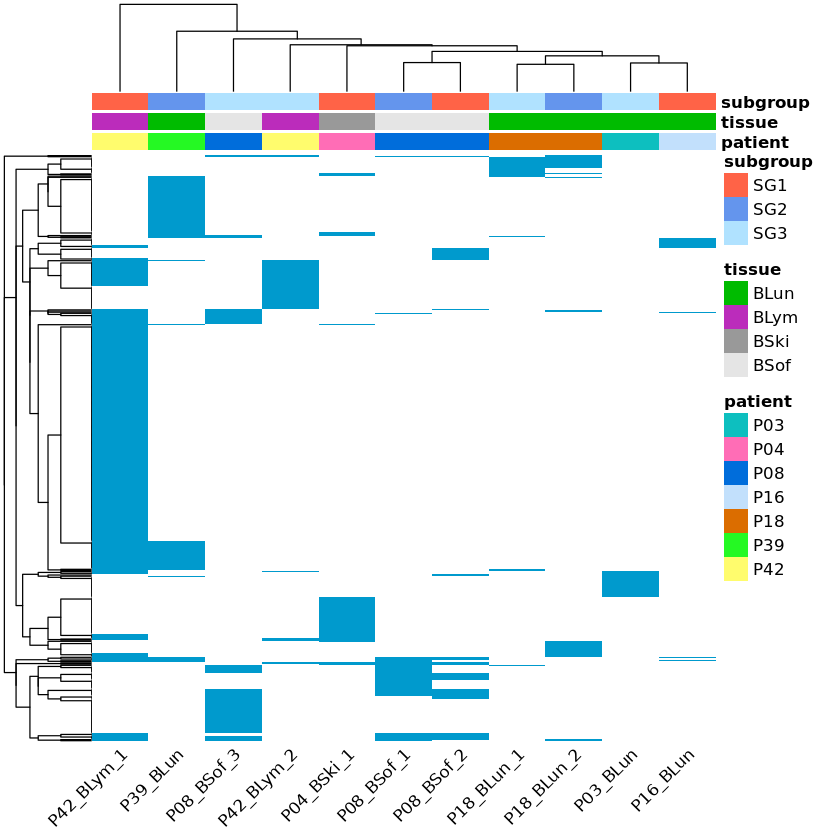

In [35]:
hmGenesPat = pheatmap(mat = genesPatients,annotation_col=colAnnot, legend = F,color = c("white","deepskyblue3"),
                      show_rownames = F, angle_col = 45,
                   annotation_colors = annotColors)

In [36]:
svg(filename = "FiguresTables/SupplFigure-S4-genes-vs-samplePairs-part1.svg")
hmGenesPat
dev.off()

png 
  2

### S2B: genes shared by at least four met. pairs

[1] 11

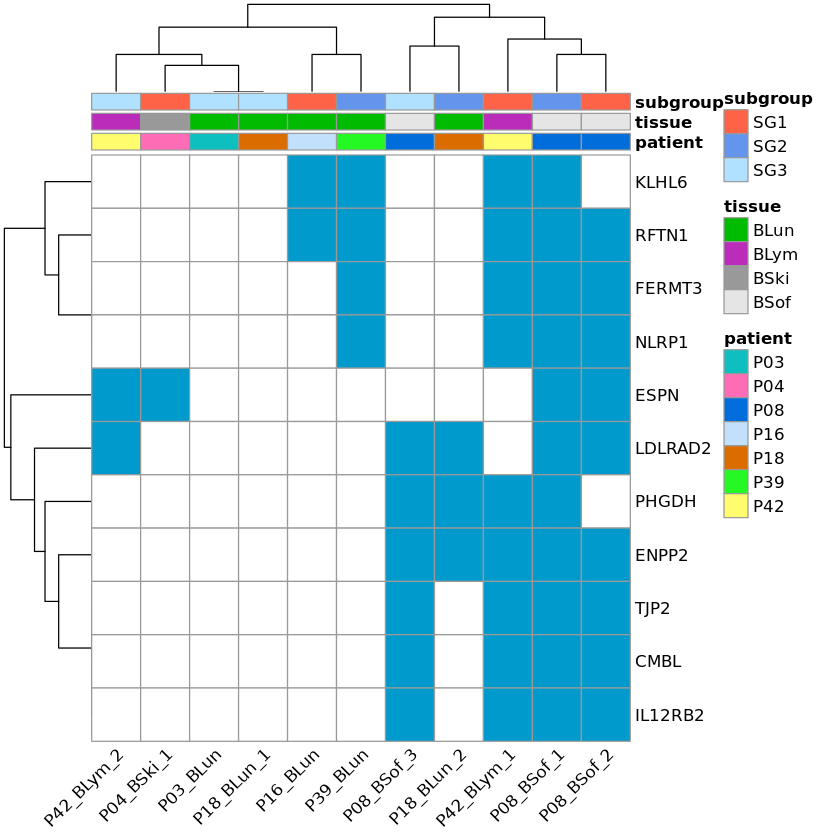

In [38]:
rs = rowSums(genesPatients)
wh = which(rs > 3)
length(wh)
hmGenesPatSub = pheatmap(mat = genesPatients[wh,],annotation_col=colAnnot, legend = F,
                         color = c("white","deepskyblue3"),show_rownames = T, angle_col = 45,
                   annotation_colors = annotColors)

In [39]:
svg(filename = "FiguresTables/SupplFigure-S4-genes-vs-samplePairs-part2.svg")
hmGenesPatSub
dev.off()

png 
  2

### S2C: distribution of how many genes shared by how many sample pairs

In [40]:
rs = as.numeric(table(rowSums(genesPatients)))
data = data.frame(num_met_pairs = rowSums(genesPatients), gene =rownames(genesPatients))

png 
  2

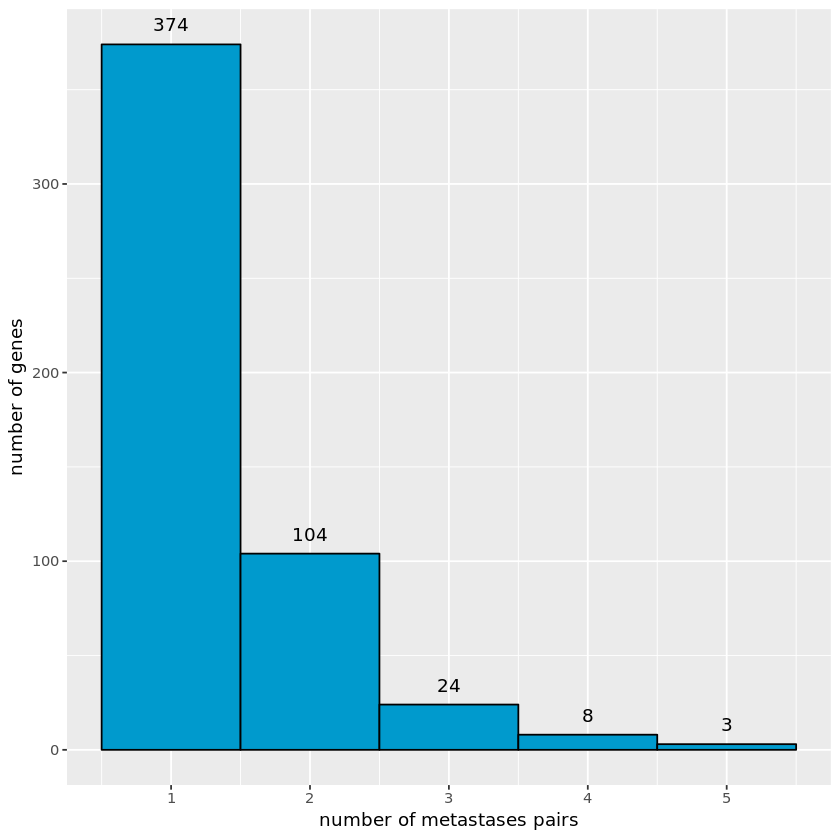

In [43]:
barplotGenesShared = ggplot(data, aes(x=num_met_pairs)) + geom_histogram(binwidth=1, fill = c("deepskyblue3"), col="black") + 
    xlab("number of metastases pairs") + ylab("number of genes")  + 
    annotate("text", x=1:5,y=rs, label=rs, vjust=-1)
barplotGenesShared
svg(filename = "FiguresTables/SupplFigure-S4-genes-vs-samplePairs-part3.svg")
barplotGenesShared
dev.off()

### S2D: which genes shared by at least 3 met. pairs

png 
  2

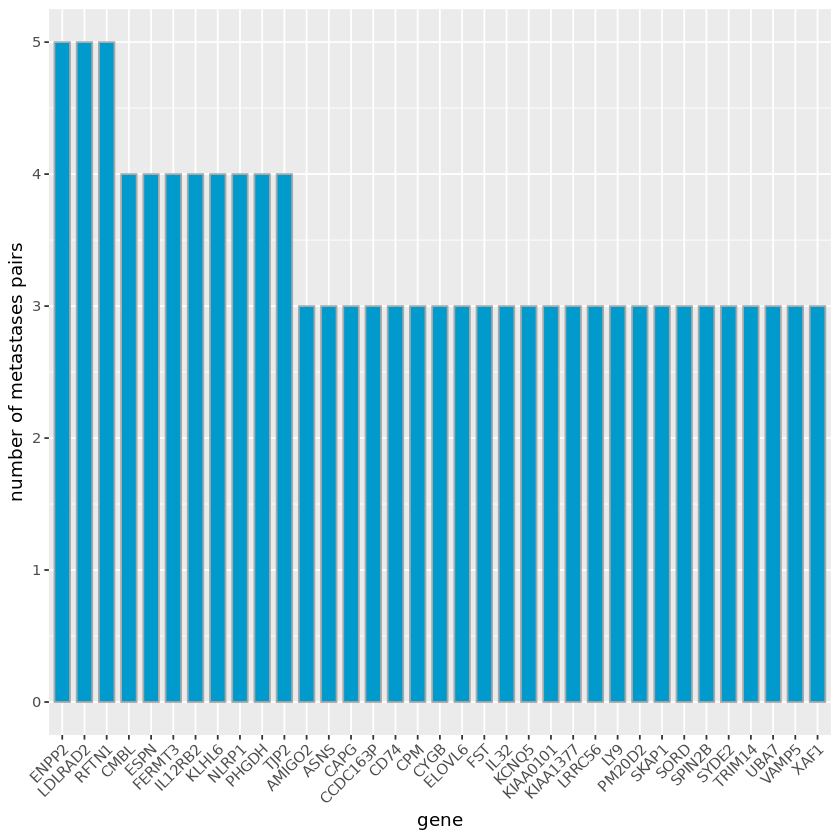

In [47]:
histoGenesShared = ggplot(data[ data$num_met_pairs>=3,], aes(x = reorder(gene,-num_met_pairs), y=num_met_pairs)) + 
    geom_bar(stat="identity", fill = c("deepskyblue3"), col="darkgrey", width = 0.7) + 
    xlab("gene") + ylab("number of metastases pairs") + theme(axis.text.x=element_text(angle = 45, hjust = 1))
histoGenesShared

svg(filename = "FiguresTables/SupplFigure-S4-genes-vs-samplePairs-part4.svg")
histoGenesShared
dev.off()

subplots were then merged in Inkscape